<a href="https://colab.research.google.com/github/Bolshartd/evaluation_quality/blob/main/%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%B0%D0%BA%D0%BE%D0%B2_%D0%90_%D0%94_%22%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Название проекта
Оценка качества лакокрасочного покрытия производственных деталей с использованием ИИ (на примере теста на адгезию)

ФИО: Большаков Артем Дмитриевич



# Проблематика
Во всех сферах деятельности человека существуют множество факторов, которые в той или иной степени влияют на итоговое качество продукта или услуг. Главный фактор, который каждый работодатель хочет минимизировать - это человеческий фактор. Также существует фактор - недостаточный опыт вновь прибывших сотрудников.

На примере реальных данных с производственной площадки можно разработать алгоритм, который позволит минимизировать человеческий фактор при принятии решения о годности/не годности детали во время проверки адгезии лакокрасочного покрытия, а также устранить фактор недостаточного опыта сотрудника.

Адгезия (от лат. adhaesio – прилипание) – это способность лакокрасочного покрытия к прочному сцеплению с окрашиваемой поверхностью.
Во всем мире принято оценивать проверку адгезии с помощью пяти уровней.

GU - аббревиатура с немецкого выражения, которое переводится как "крестовой тест"

Цифры 0-4 - градация приемки, где 0 и 1 годные тесты, а 2 - 4 не годные.

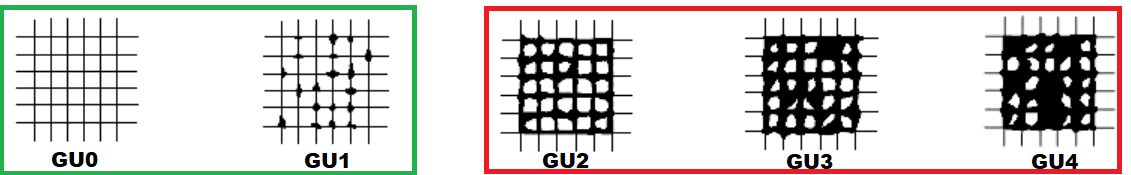

# Описание данных
Датасет состоит из порядка 400 фото с итогами проверки адгезии с производственной площадки.

Датасет с фото разделен по папкам, каждая из которых соотвествует градации результатов (GU0 - GU4)

# Предобработка данных

In [ ]:
# Подключаем Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Подключаем все необходимые библиотеки для проекта

# Для модели
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers.core.dense import Dense
from sklearn import metrics 

# Остальные
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Подружаем датасет из фото и проводим предобработку
data = []
labels = []
input_size = 224
image_size = (input_size, input_size)

# Доступ к папке хранения
directory = '/content/drive/MyDrive/Colab Notebooks/final_task/input'

# Подгружаем все фото и их классы. Храним в списках data и lables
for sub_folder in os.listdir(directory):
    sub_folder_path = os.path.join(directory, sub_folder)
    for image_file in os.listdir(sub_folder_path):
        if image_file.endswith(".JPG") or image_file.endswith(".png"):
            image_path = os.path.join(sub_folder_path, image_file)
            # Считываем изображение в image_path
            image = cv2.imread(image_path)
            # Изменяем размер изображения
            image = cv2.resize(image, image_size)
            # Добавляем изображения в список data
            data.append(image)
            # Добавляем классы в список labels
            labels.append(sub_folder)

# Конвертируем data и labels из list в numpy array
data = np.array(data)
labels = np.array(labels)

# Преобразуем данные labels в формат float64
train_test_labels = []
for i in labels:
  train_test_labels.append(i[2])
train_test_labels = np.array(list(map(float, train_test_labels)))

# Предпросмотр
print(f'data shape:{data.shape}')
print(f'labels shape:{labels.shape}')

data shape:(396, 224, 224, 3)
labels shape:(396,)


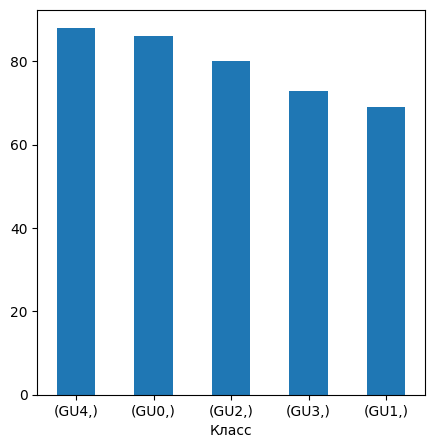

In [ ]:
# Выведем весь имеющийся датасет на экран и посмотрим на кол-во.
df = pd.DataFrame({"Класс":labels})
plt.figure(figsize=(5,5))
df.value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# Разделение на обучающую и проверочную выборки
X_train, X_test, y_train, y_test = train_test_split(data, train_test_labels, train_size=0.70)
X_train = X_train / 255.0
X_test = X_test / 225.0

In [ ]:
# Посмотрим на количество данных для обучения и тестирования
print(f'data shape:{X_train.shape}')
print(f'labels shape:{y_train.shape}')
df = pd.DataFrame({"label":y_train})
print(df.value_counts())
print("")
print(f'test_date shape:{X_test.shape}')
print(f'test_labels shape:{y_test.shape}')
df = pd.DataFrame({"test_labels":y_test})
print(df.value_counts())

data shape:(277, 224, 224, 3)
labels shape:(277,)
label
4.0      65
2.0      60
0.0      59
3.0      49
1.0      44
dtype: int64

test_date shape:(119, 224, 224, 3)
test_labels shape:(119,)
test_labels
0.0            27
1.0            25
3.0            24
4.0            23
2.0            20
dtype: int64


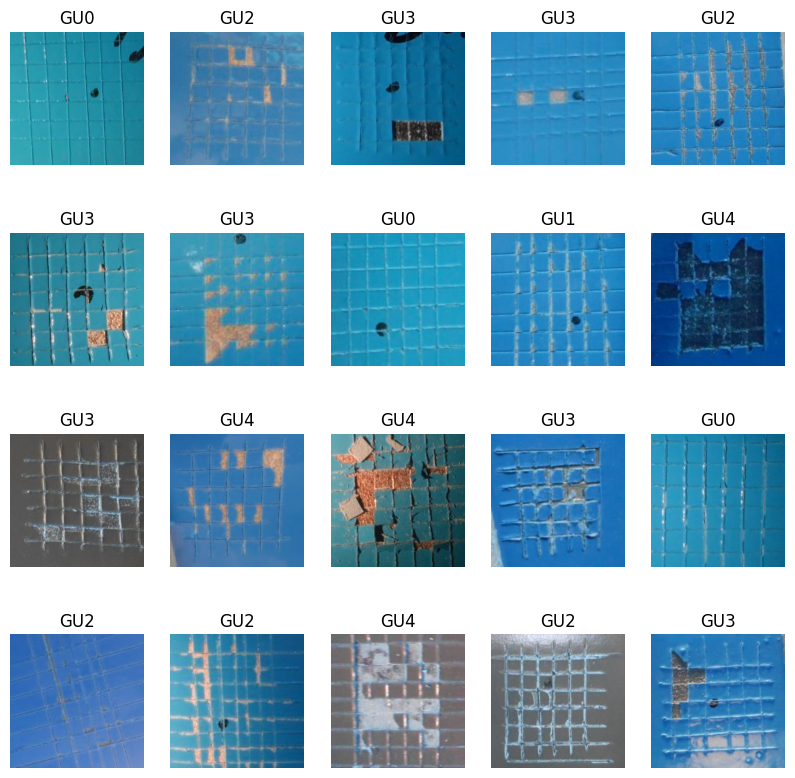

In [ ]:
# Посмотрим праильно ли загрузились данные из датасета
# Выведем на экрам случаные 20 шт картинок и посмотри на их классы
indices = np.random.randint(0, len(data), 20)

sample_images = data[indices]

fig = plt.figure(figsize=(10,10))
for i, img in enumerate(sample_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(labels[indices[i]])
    
plt.show()

In [ ]:
# Подготовим лист с названием всех классов
class_names = ['GU0', 'GU1', 'GU2', 'GU3', 'GU4']

# Моделирование

# Модель класса Keras Sequential

---

В работе будут использованы 3 модели с разным количеством обученных эпох (50, 10 и 150 эпох)

In [ ]:
# Создадим модели как объект класса Sequential
model_50 = keras.Sequential()
model_100 = keras.Sequential()
model_150 = keras.Sequential()

# Преобразуем двумерные данные изображения в одномерные
model_50.add(Flatten(input_shape=(224, 224, 3)))
model_100.add(Flatten(input_shape=(224, 224, 3)))
model_150.add(Flatten(input_shape=(224, 224, 3)))

# Добавим два слоя. Пусть в каждом слое будет 128 узлов, а функцией активации будет relu.
model_50.add(Dense(128, activation='relu'))
model_50.add(Dense(128, activation='relu'))

model_100.add(Dense(128, activation='relu'))
model_100.add(Dense(128, activation='relu'))

model_150.add(Dense(128, activation='relu'))
model_150.add(Dense(128, activation='relu'))


# Необходимо, чтобы модель выполняла роль классификатора. 
# Для этого на выходе нейросети добавляют слой с функцией активации softmax. 
# Добавим такой слой, поскольку мы классифицируем данные на 5 классов (цифры от 0 до 4), то количество узлов должно быть равно 5.
model_50.add(Dense(5, activation='softmax'))
model_100.add(Dense(5, activation='softmax'))
model_150.add(Dense(5, activation='softmax'))

# "Скомпелируем" модель. 
# В качестве аргументов передадим: оптимизатор 'adam', функцию потерь 'sparse_categorical_crossentropy' и метрику эффективности 'accuracy'.
model_50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_100.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_150.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Предварительный просмотр
model_50.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 5)                 645       
                                                                 
Total params: 19,284,869
Trainable params: 19,284,869
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Предварительный просмотр
model_100.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               19267712  
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
Total params: 19,284,869
Trainable params: 19,284,869
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Предварительный просмотр
model_150.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               19267712  
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 5)                 645       
                                                                 
Total params: 19,284,869
Trainable params: 19,284,869
Non-trainable params: 0
_________________________________________________________________


##Обученная модель на 50 эпох

In [ ]:
# Обучим модель на данных x_train, y_train. Зададим 50 эпох обучения.
model_50.fit(X_train, y_train, epochs=50)

Epoch 1/50
9/9 [==============================] - 8s 598ms/step - loss: 42.6532 - accuracy: 0.2274
Epoch 2/50
9/9 [==============================] - 9s 999ms/step - loss: 21.5591 - accuracy: 0.2094
Epoch 3/50
9/9 [==============================] - 6s 613ms/step - loss: 12.1225 - accuracy: 0.2347
Epoch 4/50
9/9 [==============================] - 5s 510ms/step - loss: 5.1250 - accuracy: 0.2780
Epoch 5/50
9/9 [==============================] - 6s 677ms/step - loss: 5.0553 - accuracy: 0.2527
Epoch 6/50
9/9 [==============================] - 3s 336ms/step - loss: 5.7187 - accuracy: 0.3285
Epoch 7/50
9/9 [==============================] - 3s 329ms/step - loss: 5.0643 - accuracy: 0.3502
Epoch 8/50
9/9 [==============================] - 3s 326ms/step - loss: 4.6942 - accuracy: 0.3394
Epoch 9/50
9/9 [==============================] - 4s 459ms/step - loss: 4.1271 - accuracy: 0.3899
Epoch 10/50
9/9 [==============================] - 4s 473ms/step - loss: 3.2370 - accuracy: 0.3935
Epoch 11/50
9/9 

In [ ]:
# Сохраним обученную модель на 50 эпох
model_50.save('model_50.h5')

In [ ]:
# Загрузим обученную модель на 50 эпох
model_50 = keras.models.load_model('/content/model_50.h5')
model_50

In [ ]:
# Определим точность и величину потерь с помощью метода evaluate(). Сделаем это на проверочных данных x_test, y_test
model_50.evaluate(X_test, y_test)

4/4 [==============================] - 0s 34ms/step - loss: 1.7315 - accuracy: 0.4874


[1.7314814329147339, 0.48739495873451233]

### Результат работы модели на 50 эпох по тестовым образцам

1/1 [==============================] - 0s 44ms/step


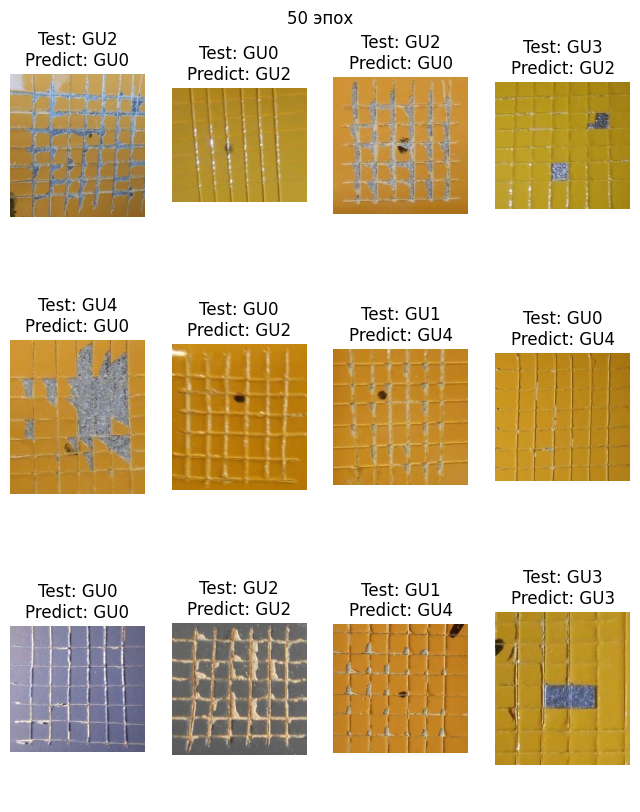

In [ ]:
# Проверим тестовые фото в папке 
# (это НЕ тестовые фото которые использовались для формирования модели)
pictures = os.listdir('/content/drive/MyDrive/Colab Notebooks/final_task/test')

# Создадим фигуру для вывода фото
pic_box = plt.figure(figsize=(8,10))

# Создадим списки по реаьным и предсказанным данным для дальнейшего вычисления метрик
y_true_50 = []
y_predict_50 = []

plt.title('50 эпох')
plt.axis('off')
# Загрузим, обработаем и сделаем предсказание по тестовым фото.
for i, picture in enumerate(pictures):
    # Считываем изображение в picture
    img_open = cv2.imread('/content/drive/MyDrive/Colab Notebooks/final_task/test/' + picture)

    # Конвертируем BGR изображение в RGB
    img_open = cv2.cvtColor(img_open, cv2.COLOR_BGR2RGB)

    # Изменяем размер изображения
    image = cv2.resize(img_open, image_size)

    # Подготавливаем изображение для предсказания
    image_array = np.asarray(image)
    image_array_n = image_array / 255.0
    data_img = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data_img[0] = image_array_n

    # Проводим предсказание
    prediction = model_50.predict(data_img)

    # Подготавливаем данные для вывода на экран
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]
    pic_box.add_subplot(3, 4, i+1)
    plt.imshow(img_open)
    plt.axis('off')
    plt.title(f"Test: {picture[0:3]}\nPredict: {class_name}")
    y_true_50.append(picture[2:3])
    y_predict_50.append(class_name[2:3])

# Выводим все созданные фигуры на экран
plt.show()

##Обученная модель на 100 эпох

In [ ]:
# Обучим модель на данных x_train, y_train. Зададим 100 эпох обучения.
model_100.fit(X_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 6s 494ms/step - loss: 36.7739 - accuracy: 0.1805
Epoch 2/100
9/9 [==============================] - 3s 336ms/step - loss: 22.7460 - accuracy: 0.2166
Epoch 3/100
9/9 [==============================] - 3s 330ms/step - loss: 16.0678 - accuracy: 0.2996
Epoch 4/100
9/9 [==============================] - 3s 330ms/step - loss: 7.0849 - accuracy: 0.2130
Epoch 5/100
9/9 [==============================] - 4s 520ms/step - loss: 6.0769 - accuracy: 0.2419
Epoch 6/100
9/9 [==============================] - 4s 439ms/step - loss: 3.9757 - accuracy: 0.3105
Epoch 7/100
9/9 [==============================] - 3s 329ms/step - loss: 5.6471 - accuracy: 0.3177
Epoch 8/100
9/9 [==============================] - 3s 330ms/step - loss: 4.1112 - accuracy: 0.3430
Epoch 9/100
9/9 [==============================] - 3s 335ms/step - loss: 2.1125 - accuracy: 0.4513
Epoch 10/100
9/9 [==============================] - 5s 523ms/step - loss: 1.6382 - accuracy: 0.4838
Epoch 

In [ ]:
# Сохраним обученную модель на 100 эпох
model_100.save('model_100.h5')

In [ ]:
# Загрузим обученную модель на 100 эпох
model_100 = keras.models.load_model('/content/model_100.h5')
model_100

In [ ]:
# Определим точность и величину потерь с помощью метода evaluate(). Сделаем это на проверочных данных x_test, y_test
model_100.evaluate(X_test, y_test)

4/4 [==============================] - 0s 56ms/step - loss: 1.7007 - accuracy: 0.5210


[1.7006710767745972, 0.5210084319114685]

### Результат работы модели на 100 эпох по тестовым образцам

1/1 [==============================] - 0s 49ms/step


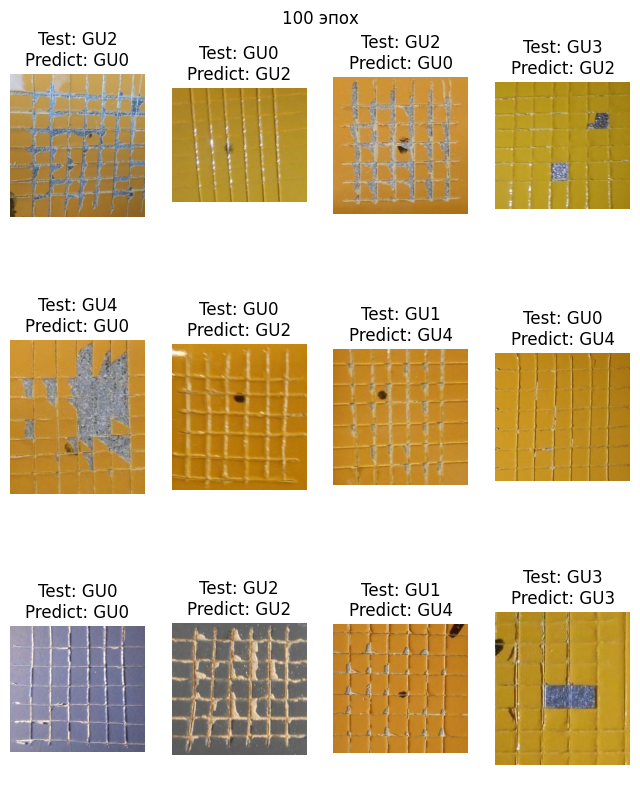

In [ ]:
# Проверим тестовые фото в папке 
# (это НЕ тестовые фото которые использовались для формирования модели)
pictures = os.listdir('/content/drive/MyDrive/Colab Notebooks/final_task/test')

# Создадим фигуру для вывода фото
pic_box = plt.figure(figsize=(8,10))

# Создадим списки по реаьным и предсказанным данным для дальнейшего вычисления метрик
y_true_100 = []
y_predict_100 = []

plt.title('100 эпох')
plt.axis('off')
# Загрузим, обработаем и сделаем предсказание по тестовым фото.
for i, picture in enumerate(pictures):
    # Считываем изображение в picture
    img_open = cv2.imread('/content/drive/MyDrive/Colab Notebooks/final_task/test/' + picture)

    # Конвертируем BGR изображение в RGB
    img_open = cv2.cvtColor(img_open, cv2.COLOR_BGR2RGB)

    # Изменяем размер изображения
    image = cv2.resize(img_open, image_size)

    # Подготавливаем изображение для предсказания
    image_array = np.asarray(image)
    image_array_n = image_array / 255.0
    data_img = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data_img[0] = image_array_n

    # Проводим предсказание
    prediction = model_100.predict(data_img)

    # Подготавливаем данные для вывода на экран
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]
    pic_box.add_subplot(3, 4, i+1)
    plt.imshow(img_open)
    plt.axis('off')
    plt.title(f"Test: {picture[0:3]}\nPredict: {class_name}")
    y_true_100.append(picture[2:3])
    y_predict_100.append(class_name[2:3])

# Выводим все созданные фигуры на экран
plt.show()

##Обученная модель на 150 эпох

In [ ]:
# Обучим модель на данных x_train, y_train. Зададим 150 эпох обучения.
model_150.fit(X_train, y_train, epochs=150)

Epoch 1/150
9/9 [==============================] - 4s 346ms/step - loss: 45.1038 - accuracy: 0.2022
Epoch 2/150
9/9 [==============================] - 3s 337ms/step - loss: 30.7133 - accuracy: 0.2383
Epoch 3/150
9/9 [==============================] - 13s 2s/step - loss: 15.4745 - accuracy: 0.2455
Epoch 4/150
9/9 [==============================] - 3s 351ms/step - loss: 14.9924 - accuracy: 0.2238
Epoch 5/150
9/9 [==============================] - 3s 353ms/step - loss: 12.1018 - accuracy: 0.1841
Epoch 6/150
9/9 [==============================] - 3s 352ms/step - loss: 5.6031 - accuracy: 0.3502
Epoch 7/150
9/9 [==============================] - 4s 513ms/step - loss: 4.4853 - accuracy: 0.3394
Epoch 8/150
9/9 [==============================] - 4s 445ms/step - loss: 3.1964 - accuracy: 0.2816
Epoch 9/150
9/9 [==============================] - 3s 343ms/step - loss: 2.1178 - accuracy: 0.4585
Epoch 10/150
9/9 [==============================] - 3s 353ms/step - loss: 1.7134 - accuracy: 0.4621
Epoch 

In [ ]:
# Сохраним обученную модель на 150 эпох
model_50.save('model_150.h5')

In [ ]:
# Загрузим обученную модель на 150 эпох
model_50 = keras.models.load_model('/content/model_150.h5')
model_50

In [ ]:
# Определим точность и величину потерь с помощью метода evaluate(). Сделаем это на проверочных данных x_test, y_test
model_150.evaluate(X_test, y_test)

4/4 [==============================] - 0s 34ms/step - loss: 3.0039 - accuracy: 0.3866


[3.0039284229278564, 0.38655462861061096]

### Результат работы модели на 150 эпох по тестовым образцам

1/1 [==============================] - 0s 36ms/step


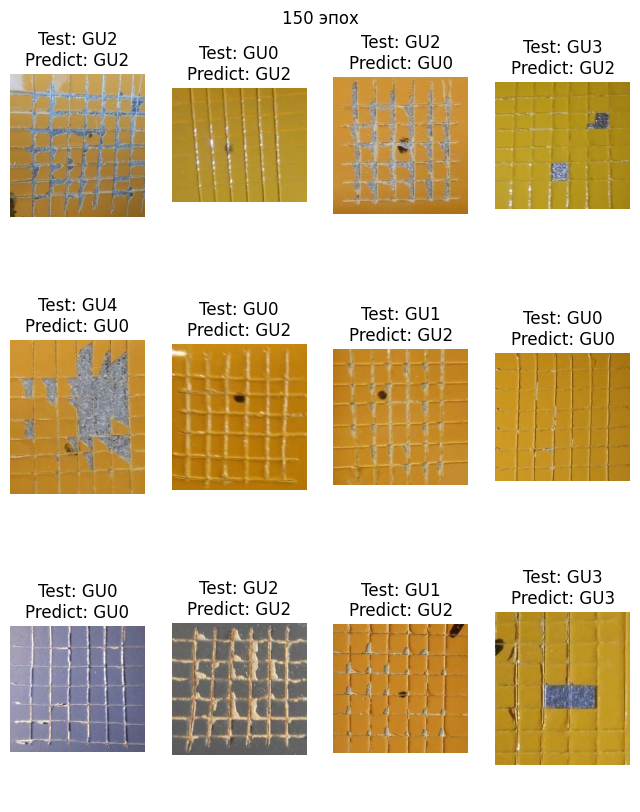

In [ ]:
# Проверим тестовые фото в папке 
# (это НЕ тестовые фото которые использовались для формирования модели)
pictures = os.listdir('/content/drive/MyDrive/Colab Notebooks/final_task/test')

# Создадим фигуру для вывода фото
pic_box = plt.figure(figsize=(8,10))

# Создадим списки по реаьным и предсказанным данным для дальнейшего вычисления метрик
y_true_150 = []
y_predict_150 = []

plt.title('150 эпох')
plt.axis('off')
# Загрузим, обработаем и сделаем предсказание по тестовым фото.
for i, picture in enumerate(pictures):
    # Считываем изображение в picture
    img_open = cv2.imread('/content/drive/MyDrive/Colab Notebooks/final_task/test/' + picture)

    # Конвертируем BGR изображение в RGB
    img_open = cv2.cvtColor(img_open, cv2.COLOR_BGR2RGB)

    # Изменяем размер изображения
    image = cv2.resize(img_open, image_size)

    # Подготавливаем изображение для предсказания
    image_array = np.asarray(image)
    image_array_n = image_array / 255.0
    data_img = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data_img[0] = image_array_n

    # Проводим предсказание
    prediction = model_150.predict(data_img)

    # Подготавливаем данные для вывода на экран
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]
    pic_box.add_subplot(3, 4, i+1)
    plt.imshow(img_open)
    plt.axis('off')
    plt.title(f"Test: {picture[0:3]}\nPredict: {class_name}")
    y_true_150.append(picture[2:3])
    y_predict_150.append(class_name[2:3])

# Выводим все созданные фигуры на экран
plt.show()

# Модель Teachable Machine

---

В работе будет использована модель созданная на сайте https://teachablemachine.withgoogle.com 

In [ ]:
model_TM = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/final_task/TeachebleMachine.h5')
model_TM

1/1 [==============================] - 0s 38ms/step


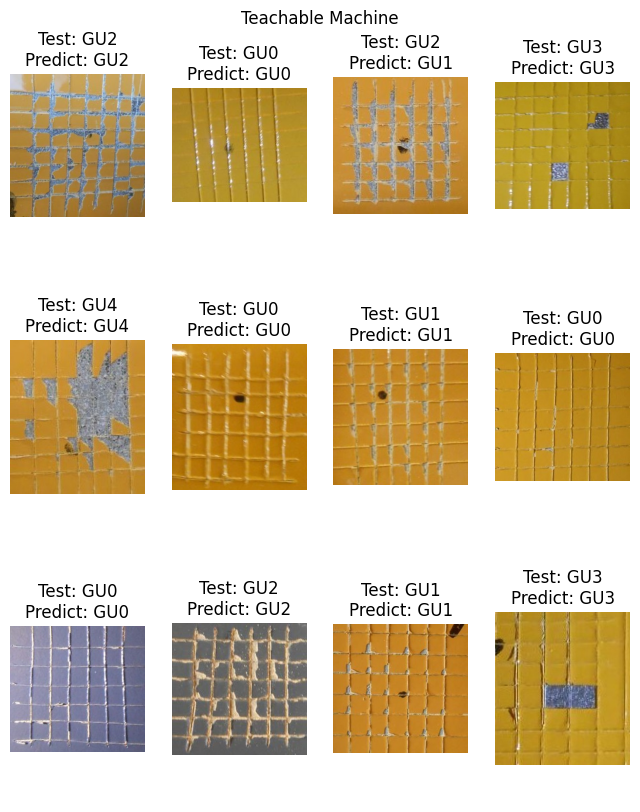

In [ ]:
# Проверим тестовые фото в папке 
# (это НЕ тестовые фото которые использовались для формирования модели)
pictures = os.listdir('/content/drive/MyDrive/Colab Notebooks/final_task/test')

# Создадим фигуру для вывода фото
pic_box = plt.figure(figsize=(8,10))

# Создадим списки по реаьным и предсказанным данным для дальнейшего вычисления метрик
y_true_TM = []
y_predict_TM = []

plt.title('Teachable Machine')
plt.axis('off')
# Загрузим, обработаем и сделаем предсказание по тестовым фото.
for i, picture in enumerate(pictures):
    # Считываем изображение в picture
    img_open = cv2.imread('/content/drive/MyDrive/Colab Notebooks/final_task/test/' + picture)
    # Конвертируем BGR изображение в RGB
    img_open = cv2.cvtColor(img_open, cv2.COLOR_BGR2RGB)

    # Изменяем размер изображения
    image = cv2.resize(img_open, image_size)

    # Подготавливаем изображение для предсказания
    image_array = np.asarray(image)
    image_array_n = image_array / 255.0
    data_img = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data_img[0] = image_array_n

    # Проводим предсказание
    prediction = model_TM.predict(data_img)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]
    pic_box.add_subplot(3, 4, i+1)
    plt.imshow(img_open)
    plt.axis('off')
    plt.title(f"Test: {picture[0:3]}\nPredict: {class_name}")
    y_true_TM.append(picture[2:3])
    y_predict_TM.append(class_name[2:3])

# Выводим все созданные фигуры на экран
plt.show()

# Оценка моделей 

## Для оценки моделей будут использованы метрики 

accuracy - доля правильных ответов

precision - показывает какую долю объектов, распознанных как объекты положительного класса, мы предсказали верно

recall - показывает, какую долю объектов, реально относящихся к положительному классу, мы предсказали верно

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc_50 = accuracy_score(y_true_50, y_predict_50)
acc_100 = accuracy_score(y_true_100, y_predict_100)
acc_150 = accuracy_score(y_true_150, y_predict_150)
acc_TM = accuracy_score(y_true_TM, y_predict_TM)
total_accuracy = {'acc_50': acc_50, 'acc_100': acc_100, 'acc_150': acc_150, 'acc_TM': acc_TM}
print(f'accuracy 50 эпох: {acc_50}\naccuracy 100 эпох: {acc_100}\naccuracy 150 эпох: {acc_150}\naccuracy Teachable Machine: {acc_50}')

accuracy 50 эпох: 0.25
accuracy 100 эпох: 0.25
accuracy 150 эпох: 0.4166666666666667
accuracy Teachable Machine: 0.25


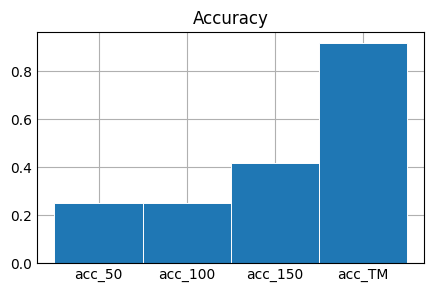

In [ ]:
# Визуализируем данные по accuracy для сравнения
plt.figure(figsize=(5,3))
plt.style.use('_mpl-gallery')
y_axes = list(total_accuracy.keys())
x_axes = list(total_accuracy.values())
plt.title('Accuracy')
plt.bar(y_axes, x_axes, width=1, edgecolor="white", linewidth=0.7)

plt.show()

Вывод: правильных ответов больше в модели Teachable Machine. Однако обученная модель со 150 эпохами также неплохо себя показала.

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
prec_50 = precision_score(y_true_50, y_predict_50, average='macro')
prec_100 = precision_score(y_true_100, y_predict_100, average='macro')
prec_150 = precision_score(y_true_150, y_predict_150, average='macro')
prec_TM = precision_score(y_true_TM, y_predict_TM, average='macro')
total_precision = {'prec_50': prec_50, 'prec_100': prec_100, 'prec_150': prec_150, 'prec_TM': prec_TM}
print(f'precision 50 эпох: {prec_50}\nprecision 100 эпох: {prec_100}\nprecision 150 эпох: {prec_150}\nprecision Teachable Machine: {prec_50}')

precision 50 эпох: 0.3
precision 100 эпох: 0.3
precision 150 эпох: 0.3571428571428571
precision Teachable Machine: 0.3


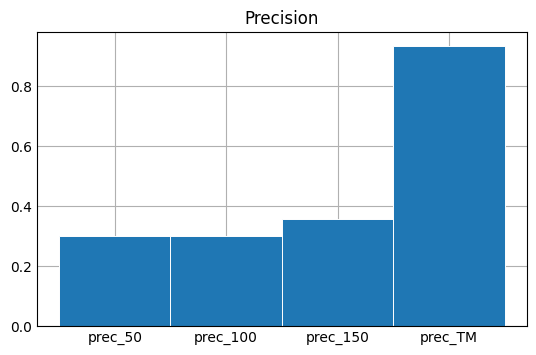

In [ ]:
# Визуализируем данные по accuracy для сравнения
plt.figure(figsize=(5,3))
plt.style.use('_mpl-gallery')
y_axes = list(total_precision.keys())
x_axes = list(total_precision.values())
plt.title('Precision')
plt.bar(y_axes, x_axes, width=1, edgecolor="white", linewidth=0.7)

plt.show()

Вывод: долей ответов больше в модели Teachable Machine. Остальные модели сильно отстают по показателю.

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
rec_50 = recall_score(y_true_50, y_predict_50, average='macro')
rec_100 = recall_score(y_true_100, y_predict_100, average='macro')
rec_150 = recall_score(y_true_150, y_predict_150, average='macro')
rec_TM = recall_score(y_true_TM, y_predict_TM, average='macro')
total_recall = {'rec_50': rec_50, 'rec_100': rec_100, 'rec_150': rec_150, 'rec_TM': rec_TM}
print(f'recall 50 эпох: {rec_50}\nrecall 100 эпох: {rec_100}\nrecall 150 эпох: {rec_150}\nrecall Teachable Machine: {rec_50}')

recall 50 эпох: 0.21666666666666665
recall 100 эпох: 0.21666666666666665
recall 150 эпох: 0.3333333333333333
recall Teachable Machine: 0.21666666666666665


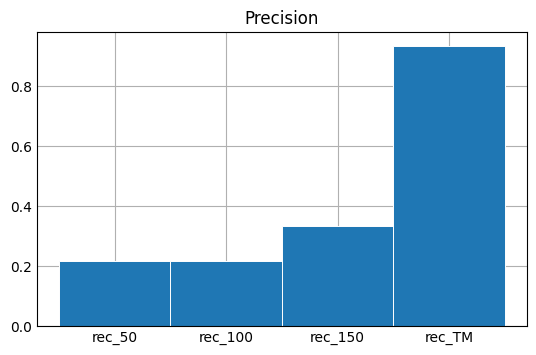

In [ ]:
# Визуализируем данные по accuracy для сравнения
plt.figure(figsize=(5,3))
plt.style.use('_mpl-gallery')
y_axes = list(total_recall.keys())
x_axes = list(total_recall.values())
plt.title('Precision')
plt.bar(y_axes, x_axes, width=1, edgecolor="white", linewidth=0.7)

plt.show()

Вывод: модель Teachable Machine предсказала верно большую долю объектов.

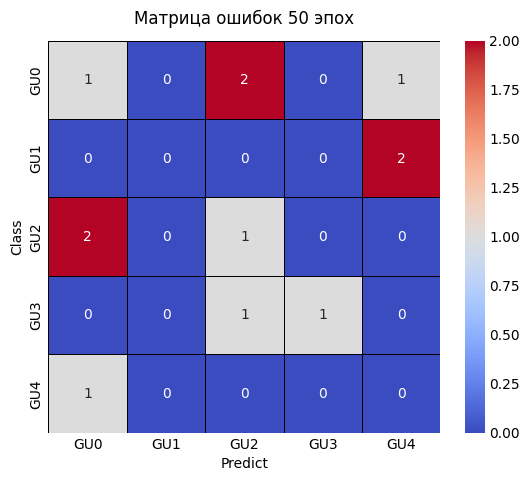

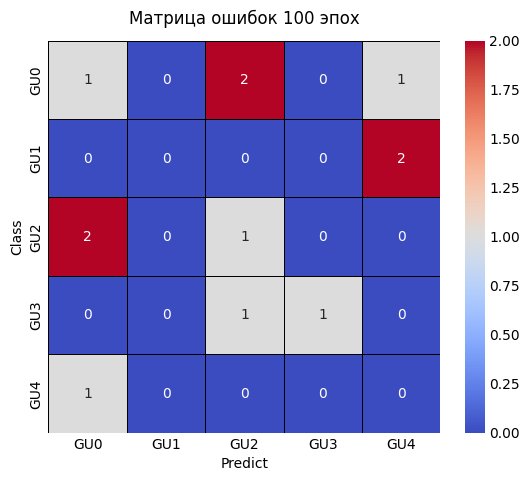

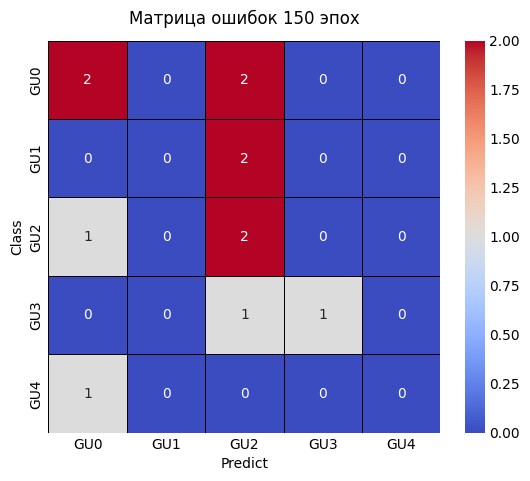

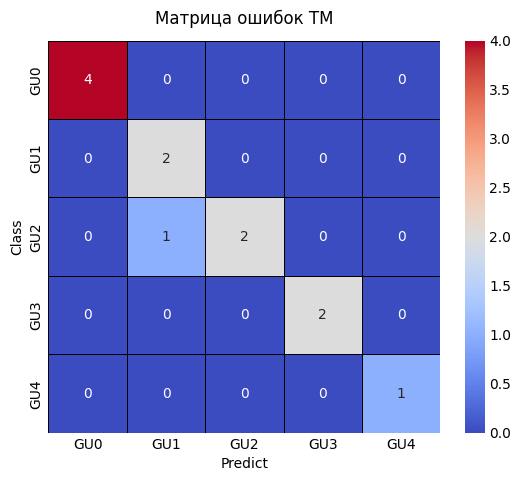

In [ ]:
# Визуализируем количество ошибок в предсказаниях.
# На пересечении одинаковых классов показывается кол-во совпадений.
predicted_confusion_matrix50 = metrics.confusion_matrix(y_true_50, y_predict_50)
predicted_confusion_matrix100 = metrics.confusion_matrix(y_true_100, y_predict_100)
predicted_confusion_matrix150 = metrics.confusion_matrix(y_true_150, y_predict_150)
predicted_confusion_matrixTM = metrics.confusion_matrix(y_true_TM, y_predict_TM)

df_50 = pd.DataFrame(predicted_confusion_matrix50)
df_50.columns = class_names
df_50.index = class_names
plt.figure(figsize = (5,4))
heatmap = sns.heatmap(df_50, annot=True, cmap= 'coolwarm', linewidths=0.5, linecolor='black')
heatmap.set_title('Матрица ошибок 50 эпох', fontdict={'fontsize':12}, pad=12);
heatmap.set_xlabel('Predict')
heatmap.set_ylabel('Class')

df_100 = pd.DataFrame(predicted_confusion_matrix100)
df_100.columns = class_names
df_100.index = class_names
plt.figure(figsize = (5,4))
heatmap = sns.heatmap(df_100, annot=True, cmap= 'coolwarm', linewidths=0.5, linecolor='black')
heatmap.set_title('Матрица ошибок 100 эпох', fontdict={'fontsize':12}, pad=12);
heatmap.set_xlabel('Predict')
heatmap.set_ylabel('Class')

df_150 = pd.DataFrame(predicted_confusion_matrix150)
df_150.columns = class_names
df_150.index = class_names
plt.figure(figsize = (5,4))
heatmap = sns.heatmap(df_150, annot=True, cmap= 'coolwarm', linewidths=0.5, linecolor='black')
heatmap.set_title('Матрица ошибок 150 эпох', fontdict={'fontsize':12}, pad=12);
heatmap.set_xlabel('Predict')
heatmap.set_ylabel('Class')

df_TM = pd.DataFrame(predicted_confusion_matrixTM)
df_TM.columns = class_names
df_TM.index = class_names
plt.figure(figsize = (5,4))
heatmap = sns.heatmap(df_TM, annot=True, cmap= 'coolwarm', linewidths=0.5, linecolor='black')
heatmap.set_title('Матрица ошибок TM', fontdict={'fontsize':12}, pad=12);
heatmap.set_xlabel('Predict')
heatmap.set_ylabel('Class')
plt.show()

# Развертывание модели
Полученную модель можно интегрировать в производство в виде приложения на смартфоне, развернуть небольшую страничку в браузере, либо **интегрировать в ПО одного из приборов по проверке лакокрасочного покрытия( например спектрофотометр, который имеет встроенную камеру, цветной дисплей и неплохое ПО)**

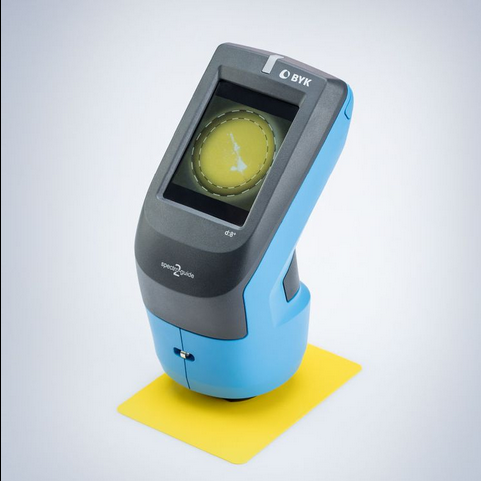
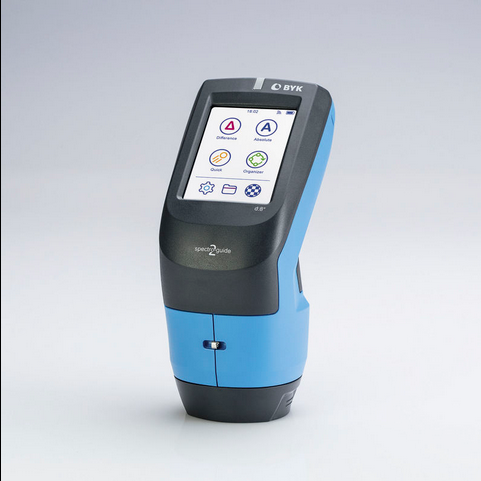

# Выводы по работе

В рамках рботы были изменены только некоторые параметры модели (кол-во эпох). Однако и это дает понять, что разница в результатах существует и только экспериментально можно добиться нужного результата.

Используя разные параметры для регулирования моделью можно настроить модель так, чтобы все метрики были довольно высокими. Для этого нужно немного больше разобраться во всех тонкостях настройки,а также проводить больше экспериментов пока модель не будет работать приемлемо.